In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms
# %pip install plotly

In [2]:
from utils import GPR, mean_squared_error, visualize, generate_sample

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from tqdm import tqdm
import plotly.express as px

np.random.seed(42)

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

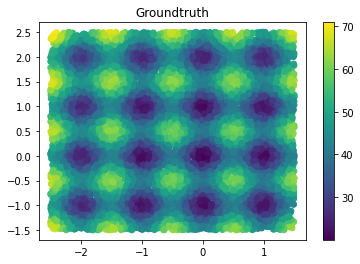

In [4]:
X_test, y_test = generate_sample(10_000, 2, (-2.5, -1.5), (1.5, 2.5), target_func)
visualize(X_test, y_test, title='Groundtruth')

In [5]:
N = 500
X_train, y_train = generate_sample(N, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=1)

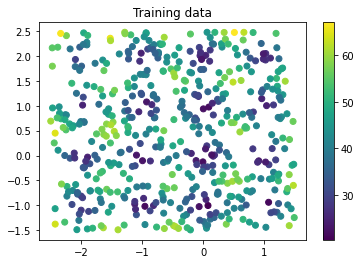

In [6]:
visualize(X_train, y_train, title='Training data')

In [7]:
hp = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 10,
    'n_particles': 10,
    'n_restarts_optimizer': 10
}

gpr = GPR(**hp)

In [8]:
gpr = gpr.fit(X_train, y_train)

In [ ]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

In [16]:
# dauert 40s
gpr = gpr.hyper_optimize(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


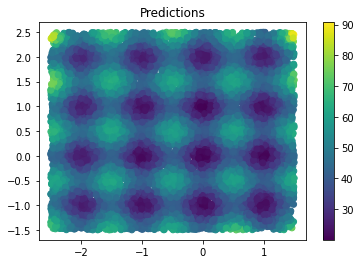

In [9]:
y_pred = gpr.predict(X_test)
visualize(X_test, y_pred, title='Predictions')

In [10]:
mean_squared_error(y_test, y_pred)

2.0513829132439323

In [13]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=0)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=n_data_points, y=errors, title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:19<00:00,  2.84s/it]


In [15]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=noise)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [01:18<00:00, 13.14s/it]
